# Import Libraries

---



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_dataset_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset'

## Target Dataset

In [ ]:
imgs = os.listdir(os.path.join(drive_dataset_path, 'Images'))

In [ ]:
attribute_df = pd.read_csv(os.path.join(drive_dataset_path, 'list_attribute.txt'), delimiter=r'\s+', skiprows=1)

In [ ]:
attribute_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df = attribute_df[['Male']]

In [ ]:
df.head()

,Male
000001.jpg,-1
000002.jpg,-1
000003.jpg,1
000004.jpg,-1
000005.jpg,-1


In [ ]:
df.replace(-1, 0, inplace=True)

<ipython-input-9-d84944b5799e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, 0, inplace=True)


In [ ]:
df.head()

,Male
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Male    202599 non-null  int64
dtypes: int64(1)
memory usage: 3.1+ MB


In [ ]:
target_df = df.loc[df.index.isin(imgs)] #tanya

In [ ]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 000051.jpg to 202566.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    5000 non-null   int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [ ]:
target_df.value_counts()

Male
0       2953
1       2047
dtype: int64

## Handle Imbalanced Data

### Undersampling

In [ ]:
def undersampling(df, target):
    # Get the counts of each class
    class_counts = df[target].value_counts()

    # Find the minority class
    minority_class = class_counts.idxmin()

    # Get the number of samples in the minority class
    minority_class_count = class_counts[minority_class]

    # Get indices of the majority class
    majority_class_indices = df[df[target] != minority_class].index

    # Randomly sample from the majority class to match the minority class
    undersampled_majority_indices = df[df[target] == minority_class].index.union(
        df.loc[majority_class_indices].sample(n=minority_class_count, random_state=42).index
    )

    # Create the balanced dataset
    balanced_df = df.loc[undersampled_majority_indices]

    # Your balanced dataset
    print(balanced_df[target].value_counts())

    return balanced_df

In [ ]:
target_df = undersampling(target_df, 'Male')

1    2047
0    2047
Name: Male, dtype: int64


## Image Dataset

## Train Val Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_test_df = train_test_split(target_df, random_state=88, test_size=0.3, stratify=target_df['Male']) #tanya male
val_df, test_df = train_test_split(val_test_df, random_state=88, test_size=0.4, stratify=val_test_df['Male'])

### train

In [ ]:
train_df.head()

,Male
139406.jpg,1
172061.jpg,1
069813.jpg,0
142502.jpg,0
136281.jpg,0


In [ ]:
train_df.value_counts() #tanya kenapa beda 1

Male
1       1433
0       1432
dtype: int64

### val

In [ ]:
val_df.head()

,Male
114107.jpg,0
094352.jpg,0
005334.jpg,0
016823.jpg,1
176695.jpg,0


In [ ]:
val_df.value_counts()

Male
0       369
1       368
dtype: int64

### test

In [ ]:
test_df.head()

,Male
054207.jpg,0
016633.jpg,0
159609.jpg,1
198957.jpg,0
173754.jpg,0


In [ ]:
test_df.value_counts()

Male
0       246
1       246
dtype: int64

In [ ]:
train_male_files = train_df[train_df['Male'] == 1].index.to_list()
train_female_files = train_df[train_df['Male'] == 0].index.to_list() #ini buat apa

val_male_files = val_df[val_df['Male'] == 1].index.to_list()
val_female_files = val_df[val_df['Male'] == 0].index.to_list()

test_male_files = test_df[test_df['Male'] == 1].index.to_list()
test_female_files = test_df[test_df['Male'] == 0].index.to_list()

In [ ]:
print(f'first 5 train male files: {train_male_files[:5]}')
print(f'first 5 train female files: {train_female_files[:5]}')
print(f'first 5 val male files: {val_male_files[:5]}')
print(f'first 5 val female files: {val_female_files[:5]}')
print(f'first 5 test male files: {test_male_files[:5]}')
print(f'first 5 test female files: {test_female_files[:5]}')

first 5 train male files: ['139406.jpg', '172061.jpg', '002125.jpg', '090773.jpg', '160302.jpg']
first 5 train female files: ['069813.jpg', '142502.jpg', '136281.jpg', '074374.jpg', '006236.jpg']
first 5 val male files: ['016823.jpg', '065387.jpg', '017366.jpg', '157981.jpg', '074839.jpg']
first 5 val female files: ['114107.jpg', '094352.jpg', '005334.jpg', '176695.jpg', '088225.jpg']
first 5 test male files: ['159609.jpg', '045903.jpg', '097471.jpg', '000771.jpg', '108680.jpg']
first 5 test female files: ['054207.jpg', '016633.jpg', '198957.jpg', '173754.jpg', '152701.jpg']


### Create Folder Structure

In [ ]:
train_male_path = os.path.join(drive_dataset_path, 'gender/train/male')
train_female_path = os.path.join(drive_dataset_path, 'gender/train/female')

val_male_path = os.path.join(drive_dataset_path, 'gender/validation/male')
val_female_path = os.path.join(drive_dataset_path, 'gender/validation/female')

test_male_path = os.path.join(drive_dataset_path, 'gender/test/male')
test_female_path = os.path.join(drive_dataset_path, 'gender/test/female')

Run once only

In [ ]:
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/female

In [ ]:
# import shutil

Handle missing values while restructure to ignore images which size equal to 0 bytes

In [ ]:
# def copy_files(source, dest, files):
#     # Copy each file from the source to the destination directory
#     for f in files:
#         if os.path.getsize(os.path.join(source, f)) > 0:
#             if not os.path.exists(os.path.join(dest, f)):
#                 source_path = os.path.join(source, f)
#                 destination_path = os.path.join(dest, f)
#                 shutil.copyfile(source_path, destination_path)
#         else:
#             print(f + " is zero length, so ignoring.")

In [ ]:
# def remove_not_existing_files(path, files):
#     rm_files = []
#     for f in os.listdir(path):
#         if f not in files:
#             rm_files.append(f)

#     for f in rm_files:
#         if os.path.exists(os.path.join(path, f)):
#             os.remove(os.path.join(path, f))
#             print(f"File '{f}' has been deleted.")

In [ ]:
# def remove_missing_files(path, files):
#     for f in files:
#         if os.path.exists(os.path.join(path, f)):
#             if not os.path.getsize(os.path.join(path, f)) > 0:
#                 os.remove(os.path.join(path, f))
#                 print(f"File '{f}' has been deleted.")

In [ ]:
# for f in imgs:
#     if os.path.getsize(os.path.join(drive_dataset_path, 'Images', f)) <= 0:
#         print(f)

In [ ]:
# remove_missing_files(train_male_path, train_male_files)
# remove_missing_files(train_female_path, train_female_files)
# remove_missing_files(val_male_path, val_male_files)
# remove_missing_files(val_female_path, val_female_files)
# remove_missing_files(test_male_path, test_male_files)
# remove_missing_files(test_female_path, test_female_files)

In [ ]:
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_male_path, train_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_female_path, train_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_male_path, val_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_female_path, val_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_male_path, test_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_female_path, test_female_files)

In [ ]:
# remove_not_existing_files(train_male_path, train_male_files)
# remove_not_existing_files(train_female_path, train_female_files)
# remove_not_existing_files(val_male_path, val_male_files)
# remove_not_existing_files(val_female_path, val_female_files)
# remove_not_existing_files(test_male_path, test_male_files)
# remove_not_existing_files(test_female_path, test_female_files)

# EDA and data Preprosessing

# Coba 1 (CNN)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = os.path.join(drive_dataset_path, 'gender/train')
val_dir = os.path.join(drive_dataset_path, 'gender/validation')
test_dir = os.path.join(drive_dataset_path, 'gender/test')

In [ ]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen=train_datagen.flow_from_directory(train_dir,
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 2864 images belonging to 2 classes.


In [ ]:
valid_gen=test_datagen.flow_from_directory(val_dir,
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 737 images belonging to 2 classes.


In [ ]:
kernel_s=(3,3) # The size of kernel

In [ ]:
from tensorflow.keras import datasets, layers, models, regularizers

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(train_gen,epochs=30,
                  validation_data=valid_gen)

Epoch 1/30
60/60 [==============================] - 140s 2s/step - loss: 0.6996 - acc: 0.5237 - val_loss: 0.6771 - val_acc: 0.5984
Epoch 2/30
60/60 [==============================] - 52s 874ms/step - loss: 0.6623 - acc: 0.6121 - val_loss: 0.5884 - val_acc: 0.7110
Epoch 3/30
60/60 [==============================] - 54s 906ms/step - loss: 0.5958 - acc: 0.6851 - val_loss: 0.5464 - val_acc: 0.7123
Epoch 4/30
60/60 [==============================] - 51s 856ms/step - loss: 0.5367 - acc: 0.7343 - val_loss: 0.4981 - val_acc: 0.7680
Epoch 5/30
60/60 [==============================] - 52s 858ms/step - loss: 0.4721 - acc: 0.7853 - val_loss: 0.3669 - val_acc: 0.8480
Epoch 6/30
60/60 [==============================] - 53s 887ms/step - loss: 0.3946 - acc: 0.8184 - val_loss: 0.2870 - val_acc: 0.8847
Epoch 7/30
60/60 [==============================] - 52s 868ms/step - loss: 0.3427 - acc: 0.8554 - val_loss: 0.2536 - val_acc: 0.9132
Epoch 8/30
60/60 [==============================] - 51s 849ms/step - lo

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(train_gen,epochs=30,
                  validation_data=valid_gen)

Epoch 1/30
60/60 [==============================] - 55s 883ms/step - loss: 0.1524 - acc: 0.9459 - val_loss: 0.1456 - val_acc: 0.9552
Epoch 2/30
60/60 [==============================] - 53s 892ms/step - loss: 0.1254 - acc: 0.9497 - val_loss: 0.1713 - val_acc: 0.9417
Epoch 3/30
60/60 [==============================] - 50s 840ms/step - loss: 0.1238 - acc: 0.9497 - val_loss: 0.1647 - val_acc: 0.9471
Epoch 4/30
60/60 [==============================] - 54s 906ms/step - loss: 0.1267 - acc: 0.9536 - val_loss: 0.1517 - val_acc: 0.9525
Epoch 5/30
60/60 [==============================] - 52s 864ms/step - loss: 0.1159 - acc: 0.9539 - val_loss: 0.1419 - val_acc: 0.9593
Epoch 6/30
60/60 [==============================] - 52s 864ms/step - loss: 0.1269 - acc: 0.9550 - val_loss: 0.1460 - val_acc: 0.9430
Epoch 7/30
60/60 [==============================] - 50s 835ms/step - loss: 0.1182 - acc: 0.9532 - val_loss: 0.1391 - val_acc: 0.9552
Epoch 8/30
60/60 [==============================] - 52s 865ms/step - 

# Coba 2 - VGG16

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

In [ ]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )

validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")

In [ ]:
# Freezing Layers

for layer in base_model.layers[:fre]:
    layer.trainable=False

In [ ]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_5 (Bat  (None, 2, 2, 512)         2048      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         589952    
                                                      

In [ ]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

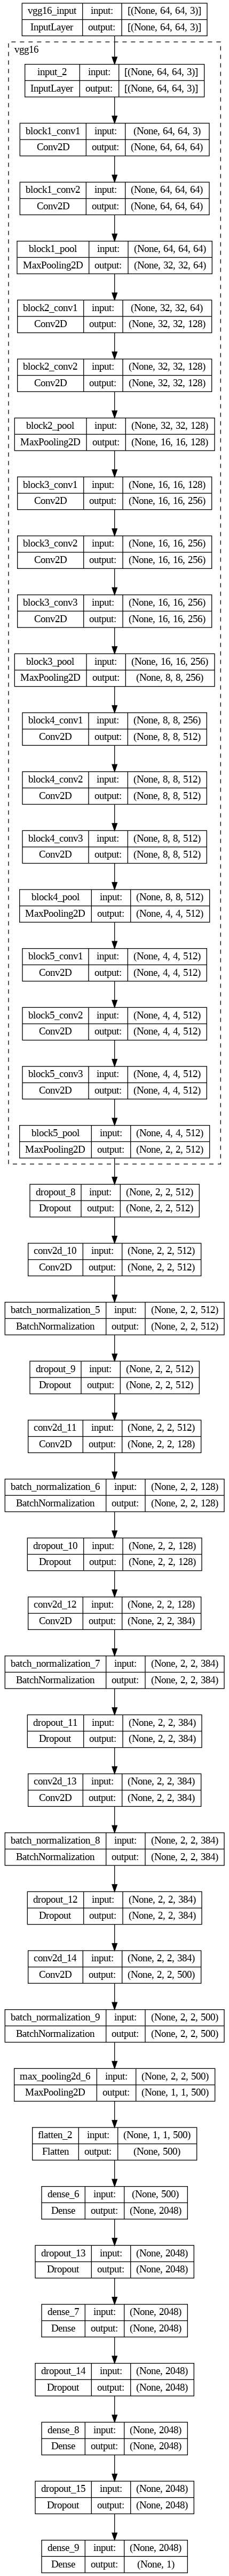

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=verbose, patience=patience)

In [ ]:
%time
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           epochs=epochs,
                           callbacks=[lrd, mcp, es])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


<ipython-input-66-3c1886542b09>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/8
45/45 [==============================] - 25s 394ms/step - loss: 1.0326 - accuracy: 0.4811 - val_loss: 0.7219 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 2/8
45/45 [==============================] - 14s 303ms/step - loss: 0.6938 - accuracy: 0.5189 - val_loss: 0.7747 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 3/8
45/45 [==============================] - 15s 337ms/step - loss: 0.6468 - accuracy: 0.6313 - val_loss: 0.7754 - val_accuracy: 0.5034 - lr: 0.0010
Epoch 4/8
45/45 [==============================] - 15s 323ms/step - loss: 0.6027 - accuracy: 0.6892 - val_loss: 0.5961 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 5/8
45/45 [==============================] - 13s 294ms/step - loss: 0.5896 - accuracy: 0.7046 - val_loss: 0.6141 - val_accuracy: 0.6893 - lr: 0.0010
Epoch 6/8
45/45 [==============================] - 15s 320ms/step - loss: 0.5718 - accuracy: 0.7224 - val_loss: 0.5384 - val_accuracy: 0.7164 - lr: 0.0010
Epoch 7/8
45/45 [==============================] - 14s 302ms/step - lo

# Coba 3 (other-vgg)

In [ ]:
# Import required libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [ ]:
IMAGE_SIZE = (218, 178)
BATCH_SIZE = 15

In [ ]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    keep_aspect_ratio=True,
    class_mode='binary')

Found 2864 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
      val_dir,
      target_size=IMAGE_SIZE,
      batch_size=BATCH_SIZE,
      keep_aspect_ratio=True,
      class_mode='binary')

Found 737 images belonging to 2 classes.


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
            keep_aspect_ratio=True,
            class_mode='binary')

Found 492 images belonging to 2 classes.


In [ ]:
base_vgg_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape= IMAGE_SIZE + (3,))

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
base_vgg_model.trainable = False
base_vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 218, 178, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 218, 178, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 109, 89, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 109, 89, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 109, 89, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 54, 44, 128)       0     

In [ ]:
vgg_model = Sequential(
    [
    base_vgg_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(256,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
]
)

In [ ]:
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 5, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 15360)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               3932416   
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
history = vgg_model.fit(train_generator, validation_data = validation_generator
                        , validation_steps=len(val_df)//BATCH_SIZE
                        ,steps_per_epoch=len(train_df)//BATCH_SIZE,
                        epochs=10, verbose = 1, callbacks=callbacks)

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.7835

191/191 [==============================] - 50s 233ms/step - loss: 0.4474 - accuracy: 0.7835 - val_loss: 0.2814 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.8631

191/191 [==============================] - 43s 226ms/step - loss: 0.3280 - accuracy: 0.8631 - val_loss: 0.2095 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.8827

191/191 [==============================] - 42s 217ms/step - loss: 0.2793 - accuracy: 0.8827 - val_loss: 0.2212 - val_accuracy: 0.9116 - lr: 0.0010
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.8984

191/191 [==============================] - 43s 224ms/step - loss: 0.2609 - accuracy: 0.8984 - val_loss: 0.1934 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.8994

191/191 [==============================] - 43s 225ms/step - loss: 0.2474 - accuracy: 0.8994 - val_loss: 0.2327 - val_accuracy: 0.9061 - lr: 0.0010
Epoch 6/10
191/191 [==============================] - ETA: 0s - loss: 0.2296 - accuracy: 0.9012

191/191 [==============================] - 41s 216ms/step - loss: 0.2296 - accuracy: 0.9012 - val_loss: 0.2006 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 7/10
191/191 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9082

191/191 [==============================] - 40s 210ms/step - loss: 0.2265 - accuracy: 0.9082 - val_loss: 0.1843 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 8/10
191/191 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.9054

191/191 [==============================] - 42s 220ms/step - loss: 0.2223 - accuracy: 0.9054 - val_loss: 0.1891 - val_accuracy: 0.9252 - lr: 0.0010
Epoch 9/10
191/191 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9113

191/191 [==============================] - 41s 211ms/step - loss: 0.2156 - accuracy: 0.9113 - val_loss: 0.1987 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 10/10
191/191 [==============================] - ETA: 0s - loss: 0.2112 - accuracy: 0.9155

191/191 [==============================] - 41s 215ms/step - loss: 0.2112 - accuracy: 0.9155 - val_loss: 0.1881 - val_accuracy: 0.9252 - lr: 0.0010


In [ ]:
predict = vgg_model.predict(test_generator, steps=np.ceil(len(test_df)/BATCH_SIZE))

33/33 [==============================] - 310s 10s/step


In [ ]:
prediction = predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [ ]:
test_df

,Male,Prediction
054207.jpg,0,Male
016633.jpg,0,Female
159609.jpg,1,Female
198957.jpg,0,Female
173754.jpg,0,Female
...,...,...
082981.jpg,0,Male
191656.jpg,0,Female
054973.jpg,0,Female
150075.jpg,0,Male


In [ ]:
test_df['gender'] = test_df['gender'].replace({1: 'male', 0: 'female'})

KeyError: ignored

In [ ]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

KeyError: ignored

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

NameError: ignored

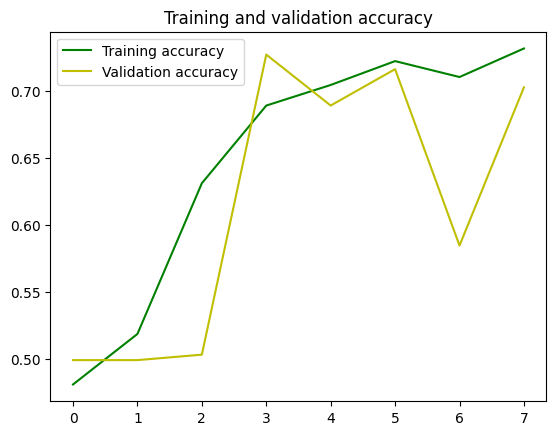

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# ------

In [ ]:
train_dir = os.path.join(drive_dataset_path, 'gender/train')
val_dir = os.path.join(drive_dataset_path, 'gender/validation')
test_dir = os.path.join(drive_dataset_path, 'gender/test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
width = 150
height = 150

In [ ]:
# ini buat apa??

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(width, height),
            batch_size=128,
            keep_aspect_ratio=True,
            class_mode='binary')

    # Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
            val_dir,
            target_size=(width, height),
            batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')

test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(width, height),
            batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')



Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


In [ ]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

In [ ]:
kernel_s=(3,3) # The size of kernel

## Model 1 (base)

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, regularizers

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=70,epochs=30,
                  validation_data=validation_generator,validation_steps=50)

Epoch 1/30


InvalidArgumentError: ignored

## Model 2 (vgg16)

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# --Data Preprocessing

In [ ]:
TRAIN_DIR = os.path.join(drive_dataset_path, 'gender/train')
VAL_DIR = os.path.join(drive_dataset_path, 'gender/validation')
TEST_DIR = os.path.join(drive_dataset_path, 'gender/test')

In [ ]:
# WIDTH = 150
# HEIGHT = 150

VGG_SIZE = 224 #ini apa
RESNET_SIZE = 224
GOOGLENET_SIZE = 299

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
def load_data_generator(train_datagen, validation_datagen, test_datagen, train_dir, val_dir, test_dir, width, height):
    # Flow training images in batches of 128 using train_datagen generator
    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(width, height),
            # batch_size=128,
            keep_aspect_ratio=True,
            class_mode='binary')

    # Flow validation images in batches of 128 using validation_datagen generator
    validation_generator = validation_datagen.flow_from_directory(
            val_dir,
            target_size=(width, height),
            # batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')

    test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(width, height),
            # batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')

    return train_generator, validation_generator, test_generator

In [ ]:
vgg_train_generator, vgg_validation_generator, vgg_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, VGG_SIZE, VGG_SIZE)
resnet_train_generator, resnet_validation_generator, resnet_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, RESNET_SIZE, RESNET_SIZE)
googlenet_train_generator, googlenet_validation_generator, googlenet_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, GOOGLENET_SIZE, GOOGLENET_SIZE)

Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


In [ ]:
# Retrieve class indices from ImageDataGenerator
class_indices = vgg_train_generator.class_indices

# Print class indices
print("Class indices:", class_indices)

Class indices: {'female': 0, 'male': 1}


# Model

## Build Model

VGG, GoogLeNet (Inception), ResNet

In [ ]:
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50

In [ ]:
vgg16 = VGG16(weights=None, input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
vgg19 = VGG19(weights=None, input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
inceptionV3 = InceptionV3(weights=None, input_shape=(GOOGLENET_SIZE, GOOGLENET_SIZE, 3), include_top=False)
resnet50 = ResNet50(weights=None, input_shape=(RESNET_SIZE, RESNET_SIZE, 3), include_top=False)

# pretrained imagenet
vgg16_pretrained = VGG16(weights='imagenet', input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
vgg19_pretrained = VGG19(weights='imagenet', input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
inceptionV3_pretrained = InceptionV3(weights='imagenet', input_shape=(GOOGLENET_SIZE, GOOGLENET_SIZE, 3), include_top=False)
resnet50_pretrained = ResNet50(weights='imagenet', input_shape=(RESNET_SIZE, RESNET_SIZE, 3), include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
def create_model(feature_extractor, input_shape, name, pretrained=False):
    if pretrained:
        for layer in feature_extractor.layers:
            layer.trainable = False

    i = tf.keras.layers.Input(shape=input_shape)
    x = feature_extractor(i)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(i, x, name=name)
    model.summary()

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

## Training Config

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

In [ ]:
def train_model(model, train_generator, validation_generator):
    history = model.fit(
      train_generator,
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      batch_size=128,
      validation_batch_size=32,
      callbacks=[early_stopping]
    )

    return history

## Transfer Learning

### GoogLeNet

In [ ]:
inceptionV3_pretrained_model = create_model(inceptionV3_pretrained, (GOOGLENET_SIZE, GOOGLENET_SIZE, 3), 'googlenet_pretrained', pretrained=True)

Model: "googlenet_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 88912673 (339.17 MB)
Trainable params: 67109889 (256.00 MB)
Non-trainable params: 21802784 (83.17 MB)
______________________________________________________________

In [ ]:
inceptionV3_pretrained_history = train_model(inceptionV3_pretrained_model, googlenet_train_generator, googlenet_validation_generator)

Epoch 1/50
103/103 [==============================] - 722s 7s/step - loss: 4.4242 - accuracy: 0.8955 - val_loss: 2.2457 - val_accuracy: 0.9219
Epoch 2/50
103/103 [==============================] - 20s 191ms/step - loss: 0.9392 - accuracy: 0.9472 - val_loss: 1.8523 - val_accuracy: 0.9280
Epoch 3/50
103/103 [==============================] - 19s 188ms/step - loss: 0.4265 - accuracy: 0.9716 - val_loss: 1.9759 - val_accuracy: 0.9194
Epoch 4/50
103/103 [==============================] - 20s 189ms/step - loss: 0.1856 - accuracy: 0.9801 - val_loss: 1.6537 - val_accuracy: 0.9280
Epoch 5/50
103/103 [==============================] - 20s 193ms/step - loss: 0.0946 - accuracy: 0.9890 - val_loss: 1.6033 - val_accuracy: 0.9255
Epoch 5: early stopping


### ResNet

In [ ]:
resnet50_pretrained_model = create_model(resnet50_pretrained, (RESNET_SIZE, RESNET_SIZE, 3), 'resnet50_pretrained', pretrained=True)

Model: "resnet50_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 51381249 (196.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_______________________________________________________________

In [ ]:
resnet50_pretrained_history = train_model(resnet50_pretrained_model, resnet_train_generator, resnet_validation_generator)

Epoch 1/50
103/103 [==============================] - 23s 184ms/step - loss: 1.1617 - accuracy: 0.5367 - val_loss: 0.9683 - val_accuracy: 0.4994
Epoch 2/50
103/103 [==============================] - 18s 179ms/step - loss: 0.6960 - accuracy: 0.6075 - val_loss: 0.5348 - val_accuracy: 0.6947
Epoch 3/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5129 - accuracy: 0.7630 - val_loss: 0.4862 - val_accuracy: 0.7436
Epoch 4/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5036 - accuracy: 0.7587 - val_loss: 0.4481 - val_accuracy: 0.8242
Epoch 5/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5216 - accuracy: 0.7572 - val_loss: 0.4491 - val_accuracy: 0.8303
Epoch 6/50
103/103 [==============================] - 15s 144ms/step - loss: 0.4663 - accuracy: 0.7715 - val_loss: 0.5331 - val_accuracy: 0.7143
Epoch 7/50
103/103 [==============================] - 15s 145ms/step - loss: 0.4505 - accuracy: 0.7905 - val_loss: 0.4334 - val_ac

### VGG

In [ ]:
vgg16_pretrained_model = create_model(vgg16_pretrained, (VGG_SIZE, VGG_SIZE, 3), 'vgg16_pretrained', pretrained=True)
vgg19_pretrained_model = create_model(vgg19_pretrained, (VGG_SIZE, VGG_SIZE, 3), 'vgg19_pretrained', pretrained=True)

In [ ]:
vgg16_pretrained_history = train_model(vgg16_pretrained_model, vgg_train_generator, vgg_validation_generator)

In [ ]:
vgg19_pretrained_history = train_model(vgg19_pretrained_model, vgg_train_generator, vgg_validation_generator)

## No Transfer Learning

### GoogLeNet

In [ ]:
inceptionV3_model = create_model(inceptionV3, (GOOGLENET_SIZE, GOOGLENET_SIZE, 3), 'googlenet')

Model: "googlenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 flatten_8 (Flatten)         (None, 131072)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               67109376  
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 88912673 (339.17 MB)
Trainable params: 88878241 (339.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________

In [ ]:
inceptionV3_history = train_model(inceptionV3_pretrained_model, googlenet_train_generator, googlenet_validation_generator)

### Resnet

In [ ]:
resnet50_model = create_model(resnet50, (RESNET_SIZE, RESNET_SIZE, 3), 'resnet50')

Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 74915841 (285.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
resnet50_history = train_model(resnet50_model, resnet_train_generator, resnet_validation_generator)

Epoch 1/50
103/103 [==============================] - 82s 387ms/step - loss: 7.6456 - accuracy: 0.5128 - val_loss: 0.7139 - val_accuracy: 0.5006
Epoch 2/50
103/103 [==============================] - 38s 368ms/step - loss: 0.6613 - accuracy: 0.6506 - val_loss: 0.7216 - val_accuracy: 0.5104
Epoch 3/50
103/103 [==============================] - 41s 395ms/step - loss: 0.5158 - accuracy: 0.7364 - val_loss: 0.6224 - val_accuracy: 0.6728
Epoch 4/50
103/103 [==============================] - 38s 369ms/step - loss: 0.3285 - accuracy: 0.8607 - val_loss: 0.4074 - val_accuracy: 0.8193
Epoch 5/50
103/103 [==============================] - 38s 370ms/step - loss: 0.2467 - accuracy: 0.8949 - val_loss: 0.3270 - val_accuracy: 0.8608
Epoch 6/50
103/103 [==============================] - 41s 394ms/step - loss: 0.1759 - accuracy: 0.9282 - val_loss: 0.4171 - val_accuracy: 0.8278
Epoch 7/50
103/103 [==============================] - 41s 397ms/step - loss: 0.1511 - accuracy: 0.9356 - val_loss: 0.2671 - val_ac

### VGG

In [ ]:
vgg16_model = create_model(vgg16, (VGG_SIZE, VGG_SIZE, 3), 'vgg16')
vgg19_model = create_model(vgg19, (VGG_SIZE, VGG_SIZE, 3), 'vgg19')

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               12845568  
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Model: "vgg1

In [ ]:
vgg16_history = train_model(vgg16_model, vgg_train_generator, vgg_validation_generator)

Epoch 1/50
  1/103 [..............................] - ETA: 58:22 - loss: 0.6932 - accuracy: 0.4688

KeyboardInterrupt: ignored

In [ ]:
vgg19_history = train_model(vgg19_model, vgg_train_generator, vgg_validation_generator)

# Evaluation

In [ ]:
def plot_accuracy(history):
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.figure()

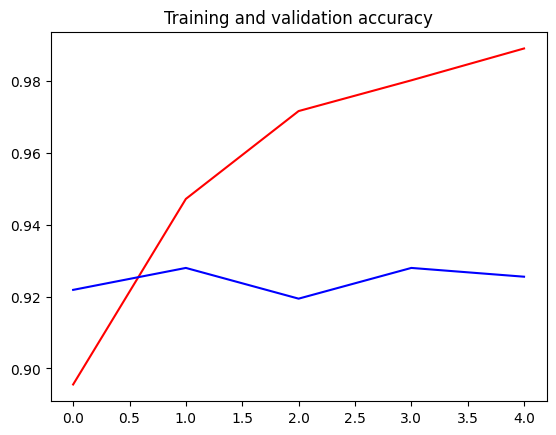

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(inceptionV3_pretrained_history)

In [ ]:
plot_accuracy(resnet50_pretrained_history)